In [1]:
from scipy.io import arff
import pandas as pd

#set names for column in dataset
index_column=["White King file",
 "White King rank",
 "White Rook file",
  "White Rook rank",
  "Black King file",
   "Black King rank","Target"]

Win_move_vs_draw=pd.read_csv("krkopt.DATA",sep=",",header=None, names=index_column)


In [2]:
class_labels=Win_move_vs_draw["Target"].unique()
Win_move_vs_draw

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,Target
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [3]:
categorical_columns = Win_move_vs_draw.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric categories
Win_move_vs_draw[categorical_columns] = Win_move_vs_draw[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
df = Win_move_vs_draw

# Assume the first column is the target and the rest are features
X = df.drop('Target', axis=1)
y = df['Target']

indices = np.arange(len(X))
np.random.shuffle(indices)

# Use the shuffled indices for splitting the data
X = X.iloc[indices]

X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

y = y[indices]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import MeanSquaredError, BinaryCrossentropy , SparseCategoricalCrossentropy
from sklearn.metrics import r2_score

#FFNN model

class FFNN_tensorflow:
    def __init__(self, input_dim, output_dim, hidden_layers=(64, 32), hidden_activation='relu', output_activation="softmax", 
                 cost_function='mean_squared_error', learning_rate=0.01, regularization=None):
        
        
        #paramters
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layers = hidden_layers
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.cost_function = cost_function
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.model = self.build_model()
 #build model
    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_layers[0], input_dim=self.input_dim, activation=self.hidden_activation))
        for layer_size in self.hidden_layers[1:]:
            model.add(Dense(layer_size, activation=self.hidden_activation))
        model.add(Dense(self.output_dim, activation=self.output_activation))
        
        #gardient method for updating SGD
        optimizer = SGD(lr=self.learning_rate)
        
       #loss function
        if self.cost_function == 'sparse_cat_cross_entropy':
            loss_function = SparseCategoricalCrossentropy()
        
        # regularizer
        if self.regularization == 'l1':
            regularizer = tf.keras.regularizers.l1()
        elif self.regularization == 'l2':
            regularizer = tf.keras.regularizers.l2()
        else:
            regularizer = None

        model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'], loss_weights=regularizer)
        return model

 
    #fitting method
    def fit(self, X, y, epochs=100, batch_size=None, validation_data=None):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
    #prediction method
    def predict(self, X):
        return self.model.predict(X)

In [ ]:
class FFNN_tensorflow:
    """
    Feedforward Neural Network (FFNN) implemented using TensorFlow.

    Parameters:
    - input_dim (int): Dimensionality of the input features.
    - output_dim (int): Dimensionality of the output (number of classes).
    - hidden_layers (tuple): Tuple specifying the sizes of hidden layers.
    - hidden_activation (str): Activation function for hidden layers.
    - output_activation (str): Activation function for the output layer.
    - cost_function (str): Loss function to optimize during training.
    - learning_rate (float): Learning rate for the stochastic gradient descent optimizer.
    - regularization (str): Regularization method ('l1', 'l2', or None).

    Methods:
    - __init__: Initializes the FFNN model with the specified parameters.
    - build_model: Constructs and compiles the FFNN model architecture.
    - fit: Trains the FFNN model on the provided data.
    - predict: Generates predictions for input data using the trained model.
    """

    def __init__(self, input_dim, output_dim, hidden_layers=(64, 32),
                 hidden_activation='relu', output_activation='softmax',
                 cost_function='mean_squared_error', learning_rate=0.01,
                 regularization=None):
        """
        Initialize the FFNN model with specified parameters.

        Parameters:
        - input_dim (int): Dimensionality of the input features.
        - output_dim (int): Dimensionality of the output (number of classes).
        - hidden_layers (tuple): Tuple specifying the sizes of hidden layers.
        - hidden_activation (str): Activation function for hidden layers.
        - output_activation (str): Activation function for the output layer.
        - cost_function (str): Loss function to optimize during training.
        - learning_rate (float): Learning rate for the stochastic gradient descent optimizer.
        - regularization (str): Regularization method ('l1', 'l2', or None).
        """

        # Parameters
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layers = hidden_layers
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.cost_function = cost_function
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.model = self.build_model()

    def build_model(self):
        """
        Build and compile the FFNN model architecture.

        Returns:
        - tf.keras.Model: Compiled FFNN model.
        """

        model = Sequential()
        model.add(Dense(self.hidden_layers[0], input_dim=self.input_dim, activation=self.hidden_activation))

        for layer_size in self.hidden_layers[1:]:
            model.add(Dense(layer_size, activation=self.hidden_activation))

        model.add(Dense(self.output_dim, activation=self.output_activation))

        # Gradient method for updating SGD
        optimizer = SGD(lr=self.learning_rate)

        # Loss function
        if self.cost_function == 'sparse_cat_cross_entropy':
            loss_function = SparseCategoricalCrossentropy()

        # Regularizer
        if self.regularization == 'l1':
            regularizer = tf.keras.regularizers.l1()
        elif self.regularization == 'l2':
            regularizer = tf.keras.regularizers.l2()
        else:
            regularizer = None

        model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'], loss_weights=regularizer)

        return model

    def fit(self, X, y, epochs=100, batch_size=None, validation_data=None):
        """
        Train the FFNN model on the provided data.

        Parameters:
        - X (numpy.ndarray): Input data.
        - y (numpy.ndarray): Target labels.
        - epochs (int): Number of training epochs.
        - batch_size (int): Batch size for training.
        - validation_data (tuple): Validation data as (X_val, y_val).
        """

        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

    def predict(self, X):
        """
        Generate predictions for input data using the trained model.

        Parameters:
        - X (numpy.ndarray): Input data.

        Returns:
        - numpy.ndarray: Model predictions.
        """

        return self.model.predict(X)


Epoch 1/700
588/588 [==============================] - 2s 2ms/step - loss: 2.2928 - accuracy: 0.2030
Epoch 2/700
588/588 [==============================] - 1s 2ms/step - loss: 2.0721 - accuracy: 0.2744
Epoch 3/700
588/588 [==============================] - 1s 2ms/step - loss: 1.9520 - accuracy: 0.3033
Epoch 4/700
588/588 [==============================] - 1s 2ms/step - loss: 1.8652 - accuracy: 0.3340
Epoch 5/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7971 - accuracy: 0.3524
Epoch 6/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7393 - accuracy: 0.3705
Epoch 7/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6892 - accuracy: 0.3874
Epoch 8/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6461 - accuracy: 0.3999
Epoch 9/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6054 - accuracy: 0.4055
Epoch 10/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5732 - accura

588/588 [==============================] - 1s 2ms/step - loss: 0.9568 - accuracy: 0.5981
Epoch 161/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9650 - accuracy: 0.6004
Epoch 162/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9613 - accuracy: 0.5989
Epoch 163/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9551 - accuracy: 0.6032
Epoch 164/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9603 - accuracy: 0.6012
Epoch 165/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9544 - accuracy: 0.6033
Epoch 166/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9567 - accuracy: 0.6021
Epoch 167/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9537 - accuracy: 0.6019
Epoch 168/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9509 - accuracy: 0.6059
Epoch 169/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9442 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.7852 - accuracy: 0.6754
Epoch 319/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7737 - accuracy: 0.6811
Epoch 320/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7781 - accuracy: 0.6778
Epoch 321/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7742 - accuracy: 0.6809
Epoch 322/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7720 - accuracy: 0.6785
Epoch 323/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7772 - accuracy: 0.6752
Epoch 324/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7744 - accuracy: 0.6799
Epoch 325/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7748 - accuracy: 0.6780
Epoch 326/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7773 - accuracy: 0.6797
Epoch 327/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7739 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.7110 - accuracy: 0.7079
Epoch 477/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7041 - accuracy: 0.7137
Epoch 478/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.7169
Epoch 479/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7003 - accuracy: 0.7133
Epoch 480/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7030 - accuracy: 0.7123
Epoch 481/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6986 - accuracy: 0.7114
Epoch 482/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7083 - accuracy: 0.7111
Epoch 483/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7031 - accuracy: 0.7136
Epoch 484/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7051 - accuracy: 0.7116
Epoch 485/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7037 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.6585 - accuracy: 0.7292
Epoch 635/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6562 - accuracy: 0.7343
Epoch 636/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6642 - accuracy: 0.7251
Epoch 637/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6646 - accuracy: 0.7271
Epoch 638/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6642 - accuracy: 0.7276
Epoch 639/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6591 - accuracy: 0.7290
Epoch 640/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6563 - accuracy: 0.7299
Epoch 641/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6674 - accuracy: 0.7251
Epoch 642/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6781 - accuracy: 0.7226
Epoch 643/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6645 - a

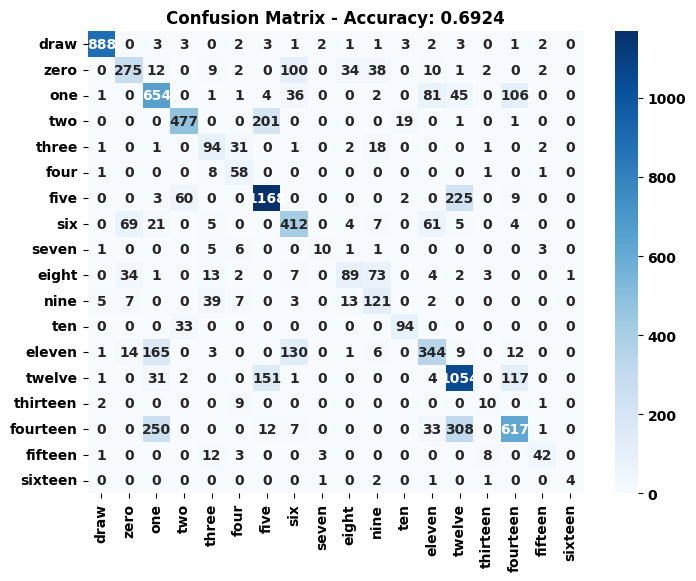

Epoch 1/700
588/588 [==============================] - 1s 2ms/step - loss: 2.3271 - accuracy: 0.1934
Epoch 2/700
588/588 [==============================] - 1s 2ms/step - loss: 2.0919 - accuracy: 0.2717
Epoch 3/700
588/588 [==============================] - 1s 2ms/step - loss: 1.9666 - accuracy: 0.3086
Epoch 4/700
588/588 [==============================] - 1s 2ms/step - loss: 1.8677 - accuracy: 0.3323
Epoch 5/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7896 - accuracy: 0.3548
Epoch 6/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7281 - accuracy: 0.3736
Epoch 7/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6733 - accuracy: 0.3888
Epoch 8/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6274 - accuracy: 0.4001
Epoch 9/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5860 - accuracy: 0.4113
Epoch 10/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5488 - accura

588/588 [==============================] - 1s 2ms/step - loss: 0.9561 - accuracy: 0.6038
Epoch 161/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9611 - accuracy: 0.5977
Epoch 162/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9566 - accuracy: 0.6012
Epoch 163/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9512 - accuracy: 0.6008
Epoch 164/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9473 - accuracy: 0.6006
Epoch 165/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9525 - accuracy: 0.6003
Epoch 166/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9476 - accuracy: 0.6013
Epoch 167/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9446 - accuracy: 0.6018
Epoch 168/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9456 - accuracy: 0.6045
Epoch 169/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9406 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.7810 - accuracy: 0.6709
Epoch 319/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7805 - accuracy: 0.6723
Epoch 320/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7849 - accuracy: 0.6709
Epoch 321/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7865 - accuracy: 0.6715
Epoch 322/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7796 - accuracy: 0.6715
Epoch 323/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7835 - accuracy: 0.6689
Epoch 324/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7821 - accuracy: 0.6716
Epoch 325/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7786 - accuracy: 0.6764
Epoch 326/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7861 - accuracy: 0.6709
Epoch 327/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7849 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.7110 - accuracy: 0.7034
Epoch 477/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7127 - accuracy: 0.7026
Epoch 478/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7158 - accuracy: 0.7065
Epoch 479/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7075 - accuracy: 0.7047
Epoch 480/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7119 - accuracy: 0.7014
Epoch 481/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7144 - accuracy: 0.7044
Epoch 482/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7153 - accuracy: 0.7017
Epoch 483/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7065 - accuracy: 0.7072
Epoch 484/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7140 - accuracy: 0.7054
Epoch 485/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7099 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.6720 - accuracy: 0.7222
Epoch 635/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6697 - accuracy: 0.7225
Epoch 636/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.7247
Epoch 637/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6688 - accuracy: 0.7235
Epoch 638/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6690 - accuracy: 0.7215
Epoch 639/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6797 - accuracy: 0.7201
Epoch 640/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6684 - accuracy: 0.7239
Epoch 641/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6704 - accuracy: 0.7198
Epoch 642/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6651 - accuracy: 0.7231
Epoch 643/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6748 - a

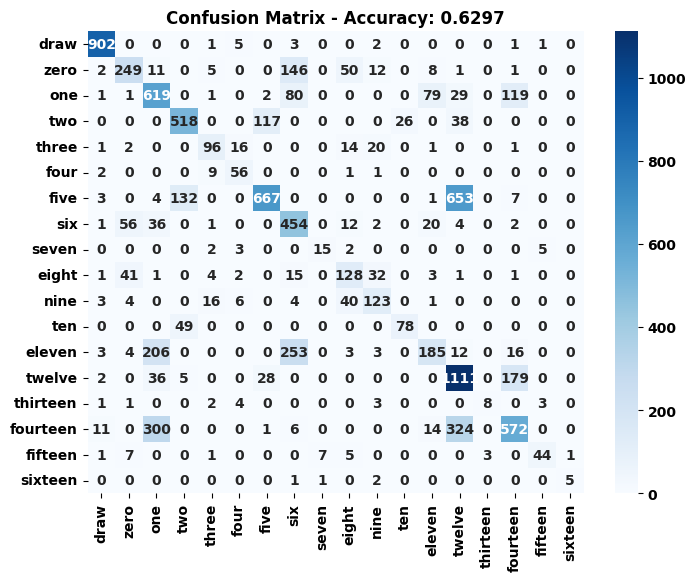

Epoch 1/700
588/588 [==============================] - 1s 2ms/step - loss: 2.3321 - accuracy: 0.1939
Epoch 2/700
588/588 [==============================] - 1s 2ms/step - loss: 2.0965 - accuracy: 0.2628
Epoch 3/700
588/588 [==============================] - 1s 2ms/step - loss: 1.9666 - accuracy: 0.3032
Epoch 4/700
588/588 [==============================] - 1s 2ms/step - loss: 1.8669 - accuracy: 0.3359
Epoch 5/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7864 - accuracy: 0.3614
Epoch 6/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7224 - accuracy: 0.3797
Epoch 7/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6706 - accuracy: 0.3867
Epoch 8/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6278 - accuracy: 0.3962
Epoch 9/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5888 - accuracy: 0.4084
Epoch 10/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5574 - accura

588/588 [==============================] - 1s 2ms/step - loss: 0.9648 - accuracy: 0.5992
Epoch 161/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9725 - accuracy: 0.5947
Epoch 162/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9644 - accuracy: 0.5991
Epoch 163/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9656 - accuracy: 0.5982
Epoch 164/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9611 - accuracy: 0.6012
Epoch 165/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9570 - accuracy: 0.6030
Epoch 166/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9555 - accuracy: 0.6059
Epoch 167/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9560 - accuracy: 0.6028
Epoch 168/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9542 - accuracy: 0.6046
Epoch 169/700
588/588 [==============================] - 1s 2ms/step - loss: 0.9448 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.8060 - accuracy: 0.6631
Epoch 319/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8153 - accuracy: 0.6613
Epoch 320/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8151 - accuracy: 0.6570
Epoch 321/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8106 - accuracy: 0.6607
Epoch 322/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8143 - accuracy: 0.6654
Epoch 323/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8189 - accuracy: 0.6576
Epoch 324/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8085 - accuracy: 0.6602
Epoch 325/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8209 - accuracy: 0.6597
Epoch 326/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8122 - accuracy: 0.6631
Epoch 327/700
588/588 [==============================] - 1s 2ms/step - loss: 0.8113 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.7377 - accuracy: 0.6890
Epoch 477/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7325 - accuracy: 0.6938
Epoch 478/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7682 - accuracy: 0.6904
Epoch 479/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7380 - accuracy: 0.6920
Epoch 480/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7409 - accuracy: 0.6901
Epoch 481/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7460 - accuracy: 0.6897
Epoch 482/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7408 - accuracy: 0.6897
Epoch 483/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7413 - accuracy: 0.6882
Epoch 484/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7550 - accuracy: 0.6888
Epoch 485/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7446 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.7097
Epoch 635/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7065 - accuracy: 0.7100
Epoch 636/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7041 - accuracy: 0.7098
Epoch 637/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7053 - accuracy: 0.7058
Epoch 638/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7056 - accuracy: 0.7116
Epoch 639/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6990 - accuracy: 0.7078
Epoch 640/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.7122
Epoch 641/700
588/588 [==============================] - 1s 2ms/step - loss: 0.7000 - accuracy: 0.7114
Epoch 642/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.7129
Epoch 643/700
588/588 [==============================] - 1s 2ms/step - loss: 0.6978 - a

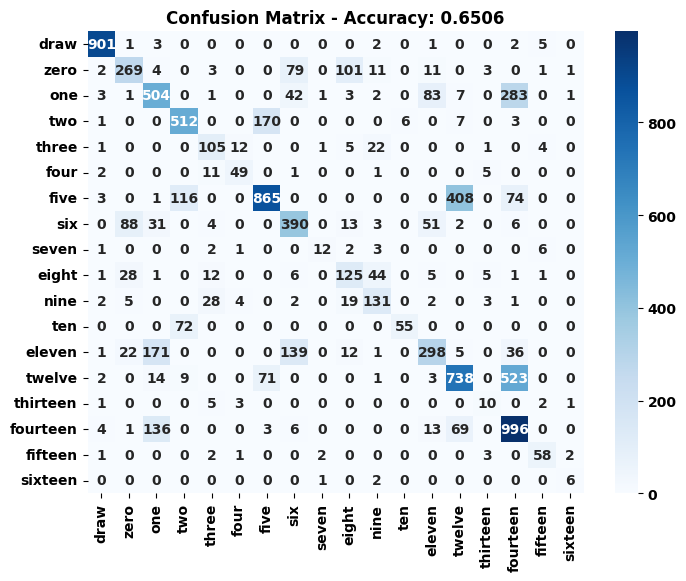

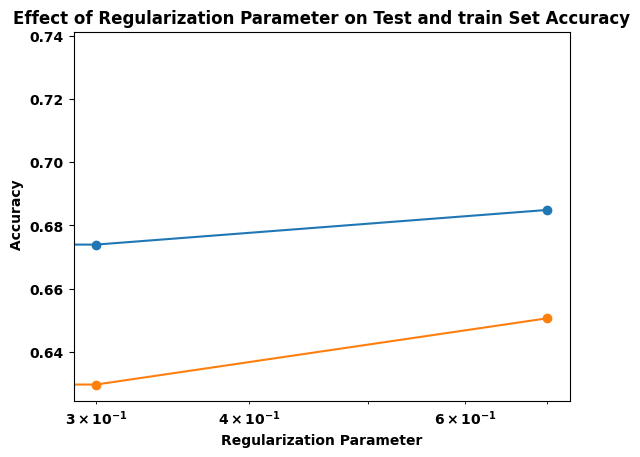

Epoch 1/700
588/588 [==============================] - 2s 2ms/step - loss: 2.3445 - accuracy: 0.1802
Epoch 2/700
588/588 [==============================] - 1s 2ms/step - loss: 2.0743 - accuracy: 0.2521
Epoch 3/700
588/588 [==============================] - 1s 2ms/step - loss: 1.8963 - accuracy: 0.3172
Epoch 4/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7628 - accuracy: 0.3521
Epoch 5/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6695 - accuracy: 0.3726
Epoch 6/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6005 - accuracy: 0.3951
Epoch 7/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5454 - accuracy: 0.4077
Epoch 8/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5020 - accuracy: 0.4239
Epoch 9/700
588/588 [==============================] - 1s 2ms/step - loss: 1.4653 - accuracy: 0.4313
Epoch 10/700
588/588 [==============================] - 1s 2ms/step - loss: 1.4393 - accura

588/588 [==============================] - 1s 2ms/step - loss: 0.5608 - accuracy: 0.7691
Epoch 161/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5569 - accuracy: 0.7759
Epoch 162/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5633 - accuracy: 0.7712
Epoch 163/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5697 - accuracy: 0.7685
Epoch 164/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5721 - accuracy: 0.7673
Epoch 165/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7751
Epoch 166/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7707
Epoch 167/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5672 - accuracy: 0.7673
Epoch 168/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7740
Epoch 169/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5423 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8509
Epoch 319/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8584
Epoch 320/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8578
Epoch 321/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8503
Epoch 322/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3744 - accuracy: 0.8514
Epoch 323/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8541
Epoch 324/700
588/588 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8480
Epoch 325/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3656 - accuracy: 0.8561
Epoch 326/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8593
Epoch 327/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3667 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8830
Epoch 477/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3122 - accuracy: 0.8824
Epoch 478/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2842 - accuracy: 0.8900
Epoch 479/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3062 - accuracy: 0.8816
Epoch 480/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8762
Epoch 481/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2956 - accuracy: 0.8831
Epoch 482/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.8888
Epoch 483/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.8895
Epoch 484/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2887 - accuracy: 0.8876
Epoch 485/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2952 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.2740 - accuracy: 0.8976
Epoch 635/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2397 - accuracy: 0.9036
Epoch 636/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2490 - accuracy: 0.9047
Epoch 637/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2488 - accuracy: 0.9022
Epoch 638/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2486 - accuracy: 0.9037
Epoch 639/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2706 - accuracy: 0.8958
Epoch 640/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2533 - accuracy: 0.9032
Epoch 641/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2504 - accuracy: 0.9035
Epoch 642/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2237 - accuracy: 0.9126
Epoch 643/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2526 - a

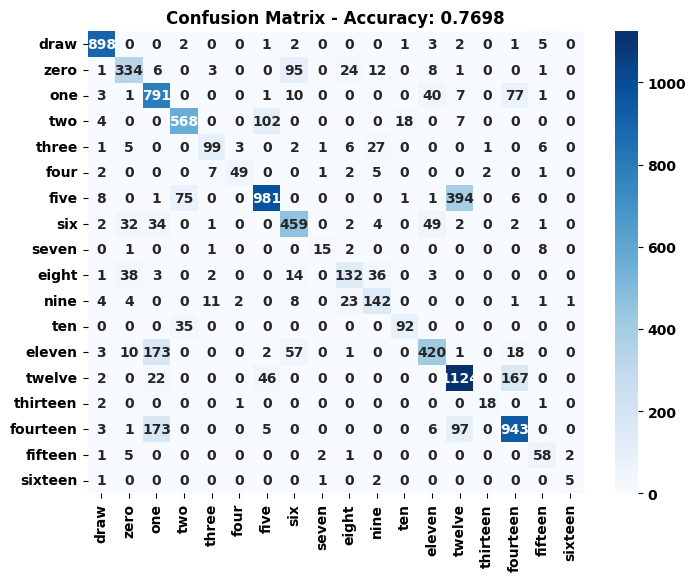

Epoch 1/700
588/588 [==============================] - 2s 2ms/step - loss: 2.2740 - accuracy: 0.2067
Epoch 2/700
588/588 [==============================] - 1s 2ms/step - loss: 1.9952 - accuracy: 0.2887
Epoch 3/700
588/588 [==============================] - 1s 2ms/step - loss: 1.8480 - accuracy: 0.3257
Epoch 4/700
588/588 [==============================] - 1s 2ms/step - loss: 1.7448 - accuracy: 0.3572
Epoch 5/700
588/588 [==============================] - 1s 2ms/step - loss: 1.6556 - accuracy: 0.3831
Epoch 6/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5927 - accuracy: 0.3976
Epoch 7/700
588/588 [==============================] - 1s 2ms/step - loss: 1.5406 - accuracy: 0.4077
Epoch 8/700
588/588 [==============================] - 1s 2ms/step - loss: 1.4949 - accuracy: 0.4202
Epoch 9/700
588/588 [==============================] - 1s 2ms/step - loss: 1.4657 - accuracy: 0.4269
Epoch 10/700
588/588 [==============================] - 1s 2ms/step - loss: 1.4285 - accura

588/588 [==============================] - 1s 2ms/step - loss: 0.5737 - accuracy: 0.7683
Epoch 161/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5757 - accuracy: 0.7650
Epoch 162/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5782 - accuracy: 0.7686
Epoch 163/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5741 - accuracy: 0.7703
Epoch 164/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5758 - accuracy: 0.7696
Epoch 165/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5739 - accuracy: 0.7640
Epoch 166/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5637 - accuracy: 0.7702
Epoch 167/700
588/588 [==============================] - 3s 5ms/step - loss: 0.5557 - accuracy: 0.7717
Epoch 168/700
588/588 [==============================] - 2s 3ms/step - loss: 0.5567 - accuracy: 0.7772
Epoch 169/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5623 - a

588/588 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8511
Epoch 319/700
588/588 [==============================] - 1s 2ms/step - loss: 0.4052 - accuracy: 0.8467
Epoch 320/700
588/588 [==============================] - 2s 3ms/step - loss: 0.3875 - accuracy: 0.8444
Epoch 321/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8492
Epoch 322/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3886 - accuracy: 0.8485
Epoch 323/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8489
Epoch 324/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8521
Epoch 325/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8465
Epoch 326/700
588/588 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8467
Epoch 327/700
588/588 [==============================] - 1s 3ms/step - loss: 0.3730 - a

In [ ]:
#system crach before time was recorded,but more then 2 hours

%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

#parameters
input_dim = X_train.shape[1]
output_dim = 18
hidden_layers = [(64,32),(64, 64,64,32),(128, 128,128,128,128,128,32)]
learning_rate = 0.01
epochs = 700
lambda_values = [0,0.3,0.7]


# Lists to store results
regularization_values = []
accuracy_values = []
accuracy_values_train = []

for j in range(3):
    for regularization in lambda_values:
       #initialized models
        model = FFNN_tensorflow(input_dim=input_dim, output_dim=output_dim, hidden_layers=hidden_layers[j],
                                 regularization=regularization, learning_rate=learning_rate,cost_function="sparse_cat_cross_entropy")
        #fit model
        model.fit(X_train, y_train, epochs=epochs)
        
        #predict on testset
        predictions = model.predict(X_test)
        predictions_train = model.predict(X_train)
        pred = np.argmax(predictions, axis=1)
        pred_train=np.argmax( predictions_train, axis=1)
        
        #calculate accuracy
        test_accuracy = np.mean(pred == y_test)
        train_accuracy = np.mean(pred_train == y_train)
        
        #calculate confusion matrix
        cm = confusion_matrix(y_test,pred)
        plt.figure(figsize=(8, 6))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - Accuracy: {test_accuracy:.4f}")
        sns.heatmap(cm, annot=True,fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        folder_path = 'C:/Users/rasyd/Documents/fys-stk4155/project3/figure/krkopt/neural_sparse'

        #  File name (with extension) and join it with the folder path
        file_path = os.path.join(folder_path, f'{hidden_layers[j]}FFNN{regularization}.png')

        # Save the plot
        plt.savefig(file_path)
        plt.show()

        # Append results to lists
        regularization_values.append(regularization)
        accuracy_values.append(test_accuracy)
        accuracy_values_train.append(train_accuracy)
    # Plot the results
    plt.plot(regularization_values, accuracy_values_train, marker='o',label="y_train")

    plt.plot(regularization_values, accuracy_values, marker='o',label="y_test")
    plt.xlabel('Regularization Parameter')
    plt.ylabel(' Accuracy')
    plt.title('Effect of Regularization Parameter on Test and train Set Accuracy')
    plt.xscale('log')  # Use log scale for better visualization if lambda values vary widely

    folder_path = 'C:/Users/rasyd/Documents/fys-stk4155/project3/figure/krkopt/neural_sparse'

    # File name (with extension) and join it with the folder path
    file_path = os.path.join(folder_path, f'FFNN_s{hidden_layers[j]}.png')

    # Save the plot
    plt.savefig(file_path)
    plt.show()
    accuracy_values = []
    accuracy_values_train=[]
    regularization_values=[]
    
    

Epoch 1/700



588/588 [==============================] - 3s 3ms/step - loss: 2.4006 - accuracy: 0.1758
Epoch 2/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0678 - accuracy: 0.2357
Epoch 3/700
588/588 [==============================] - 1s 3ms/step - loss: 1.9474 - accuracy: 0.2733
Epoch 4/700
588/588 [==============================] - 2s 3ms/step - loss: 1.7904 - accuracy: 0.3396
Epoch 5/700
588/588 [==============================] - 2s 3ms/step - loss: 1.6514 - accuracy: 0.3818
Epoch 6/700
588/588 [==============================] - 2s 3ms/step - loss: 1.5618 - accuracy: 0.4107
Epoch 7/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4998 - accuracy: 0.4257
Epoch 8/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4537 - accuracy: 0.4307
Epoch 9/700
588/588 [==============================] - 1s 3ms/step - loss: 1.4114 - accuracy: 0.4506
Epoch 10/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3746 - accuracy: 0.4584
E

588/588 [==============================] - 2s 3ms/step - loss: 0.5357 - accuracy: 0.7830
Epoch 82/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7859
Epoch 83/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5090 - accuracy: 0.7955
Epoch 84/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.7918
Epoch 85/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5049 - accuracy: 0.7975
Epoch 86/700
588/588 [==============================] - 1s 2ms/step - loss: 0.5083 - accuracy: 0.7953
Epoch 87/700
588/588 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.8002
Epoch 88/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4884 - accuracy: 0.8062
Epoch 89/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4819 - accuracy: 0.8000
Epoch 90/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4841 - accuracy: 

588/588 [==============================] - 2s 3ms/step - loss: 0.2378 - accuracy: 0.9084
Epoch 161/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2222 - accuracy: 0.9164
Epoch 162/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.9062
Epoch 163/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2129 - accuracy: 0.9180
Epoch 164/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2215 - accuracy: 0.9138
Epoch 165/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2160 - accuracy: 0.9188
Epoch 166/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2292 - accuracy: 0.9100
Epoch 167/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2234 - accuracy: 0.9154
Epoch 168/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2254 - accuracy: 0.9196
Epoch 169/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2120 - a

588/588 [==============================] - 2s 3ms/step - loss: 0.1520 - accuracy: 0.9499
Epoch 240/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0894 - accuracy: 0.9690
Epoch 241/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1418 - accuracy: 0.9515
Epoch 242/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1381 - accuracy: 0.9519
Epoch 243/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0743 - accuracy: 0.9752
Epoch 244/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1134 - accuracy: 0.9584
Epoch 245/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1162 - accuracy: 0.9587
Epoch 246/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0949 - accuracy: 0.9686
Epoch 247/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1390 - accuracy: 0.9542
Epoch 248/700
588/588 [==============================] - 1s 3ms/step - loss: 0.1001 - a

588/588 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9935
Epoch 319/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0103 - accuracy: 0.9985
Epoch 320/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0068 - accuracy: 0.9989
Epoch 321/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9996
Epoch 322/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0043 - accuracy: 0.9996
Epoch 323/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 0.9996
Epoch 324/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9998
Epoch 325/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 0.9999
Epoch 326/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9999
Epoch 327/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0027 - a

Epoch 396/700
588/588 [==============================] - 2s 3ms/step - loss: 4.5984e-04 - accuracy: 1.0000
Epoch 397/700
588/588 [==============================] - 2s 3ms/step - loss: 4.4623e-04 - accuracy: 1.0000
Epoch 398/700
588/588 [==============================] - 1s 3ms/step - loss: 4.3698e-04 - accuracy: 1.0000
Epoch 399/700
588/588 [==============================] - 2s 3ms/step - loss: 4.3290e-04 - accuracy: 1.0000
Epoch 400/700
588/588 [==============================] - 2s 3ms/step - loss: 4.2529e-04 - accuracy: 1.0000
Epoch 401/700
588/588 [==============================] - 1s 3ms/step - loss: 4.2639e-04 - accuracy: 1.0000
Epoch 402/700
588/588 [==============================] - 2s 3ms/step - loss: 4.2899e-04 - accuracy: 1.0000
Epoch 403/700
588/588 [==============================] - 2s 3ms/step - loss: 4.1759e-04 - accuracy: 1.0000
Epoch 404/700
588/588 [==============================] - 2s 3ms/step - loss: 4.1230e-04 - accuracy: 1.0000
Epoch 405/700
588/588 [==============

588/588 [==============================] - 2s 3ms/step - loss: 2.3103e-04 - accuracy: 1.0000
Epoch 473/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2983e-04 - accuracy: 1.0000
Epoch 474/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2796e-04 - accuracy: 1.0000
Epoch 475/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2626e-04 - accuracy: 1.0000
Epoch 476/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2493e-04 - accuracy: 1.0000
Epoch 477/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2373e-04 - accuracy: 1.0000
Epoch 478/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2115e-04 - accuracy: 1.0000
Epoch 479/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2193e-04 - accuracy: 1.0000
Epoch 480/700
588/588 [==============================] - 1s 3ms/step - loss: 2.2220e-04 - accuracy: 1.0000
Epoch 481/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 1.5159e-04 - accuracy: 1.0000
Epoch 549/700
588/588 [==============================] - 2s 3ms/step - loss: 1.5019e-04 - accuracy: 1.0000
Epoch 550/700
588/588 [==============================] - 2s 3ms/step - loss: 1.5127e-04 - accuracy: 1.0000
Epoch 551/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4913e-04 - accuracy: 1.0000
Epoch 552/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4926e-04 - accuracy: 1.0000
Epoch 553/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4795e-04 - accuracy: 1.0000
Epoch 554/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4845e-04 - accuracy: 1.0000
Epoch 555/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4792e-04 - accuracy: 1.0000
Epoch 556/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4559e-04 - accuracy: 1.0000
Epoch 557/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 1.1135e-04 - accuracy: 1.0000
Epoch 625/700
588/588 [==============================] - 1s 3ms/step - loss: 1.1185e-04 - accuracy: 1.0000
Epoch 626/700
588/588 [==============================] - 2s 3ms/step - loss: 1.1127e-04 - accuracy: 1.0000
Epoch 627/700
588/588 [==============================] - 1s 3ms/step - loss: 1.1084e-04 - accuracy: 1.0000
Epoch 628/700
588/588 [==============================] - 2s 3ms/step - loss: 1.1000e-04 - accuracy: 1.0000
Epoch 629/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0985e-04 - accuracy: 1.0000
Epoch 630/700
588/588 [==============================] - 1s 3ms/step - loss: 1.0972e-04 - accuracy: 1.0000
Epoch 631/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0909e-04 - accuracy: 1.0000
Epoch 632/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0877e-04 - accuracy: 1.0000
Epoch 633/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step


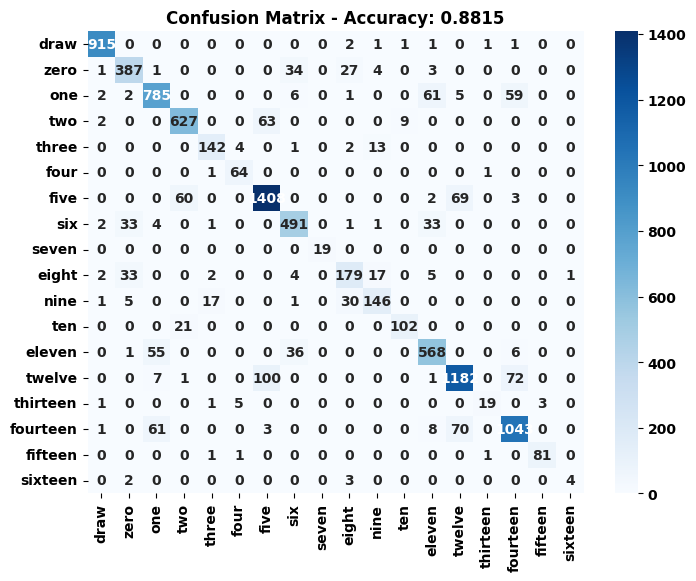

Epoch 1/700
588/588 [==============================] - 3s 3ms/step - loss: 2.3440 - accuracy: 0.1603
Epoch 2/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0875 - accuracy: 0.2383
Epoch 3/700
588/588 [==============================] - 2s 3ms/step - loss: 1.8775 - accuracy: 0.3096
Epoch 4/700
588/588 [==============================] - 2s 4ms/step - loss: 1.7169 - accuracy: 0.3565
Epoch 5/700
588/588 [==============================] - 2s 4ms/step - loss: 1.6072 - accuracy: 0.3833
Epoch 6/700
588/588 [==============================] - 2s 3ms/step - loss: 1.5267 - accuracy: 0.4133
Epoch 7/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4673 - accuracy: 0.4305
Epoch 8/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4333 - accuracy: 0.4388
Epoch 9/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3934 - accuracy: 0.4546
Epoch 10/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3640 - accura

588/588 [==============================] - 2s 3ms/step - loss: 0.5139 - accuracy: 0.7950
Epoch 82/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4976 - accuracy: 0.8013
Epoch 83/700
588/588 [==============================] - 2s 3ms/step - loss: 0.5047 - accuracy: 0.7962
Epoch 84/700
588/588 [==============================] - 1s 3ms/step - loss: 0.4956 - accuracy: 0.8012
Epoch 85/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4946 - accuracy: 0.8025
Epoch 86/700
588/588 [==============================] - 1s 2ms/step - loss: 0.4888 - accuracy: 0.8045
Epoch 87/700
588/588 [==============================] - 1s 3ms/step - loss: 0.4922 - accuracy: 0.8007
Epoch 88/700
588/588 [==============================] - 1s 3ms/step - loss: 0.4753 - accuracy: 0.8097
Epoch 89/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4626 - accuracy: 0.8124
Epoch 90/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4650 - accuracy: 

588/588 [==============================] - 2s 3ms/step - loss: 0.1960 - accuracy: 0.9252
Epoch 161/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2167 - accuracy: 0.9184
Epoch 162/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2183 - accuracy: 0.9184
Epoch 163/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2235 - accuracy: 0.9181
Epoch 164/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2108 - accuracy: 0.9201
Epoch 165/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2268 - accuracy: 0.9174
Epoch 166/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1906 - accuracy: 0.9290
Epoch 167/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2159 - accuracy: 0.9216
Epoch 168/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1862 - accuracy: 0.9302
Epoch 169/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1989 - a

588/588 [==============================] - 2s 3ms/step - loss: 0.1653 - accuracy: 0.9470
Epoch 240/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1029 - accuracy: 0.9639
Epoch 241/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9693
Epoch 242/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1028 - accuracy: 0.9653
Epoch 243/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1128 - accuracy: 0.9596
Epoch 244/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1537 - accuracy: 0.9467
Epoch 245/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0624 - accuracy: 0.9807
Epoch 246/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1606 - accuracy: 0.9464
Epoch 247/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0570 - accuracy: 0.9804
Epoch 248/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1351 - a

588/588 [==============================] - 2s 3ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 319/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9996
Epoch 320/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 0.9999
Epoch 321/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 322/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 323/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 324/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 325/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 326/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9998
Epoch 327/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0015 - a

588/588 [==============================] - 2s 3ms/step - loss: 5.9405e-04 - accuracy: 1.0000
Epoch 397/700
588/588 [==============================] - 2s 3ms/step - loss: 5.7315e-04 - accuracy: 1.0000
Epoch 398/700
588/588 [==============================] - 2s 3ms/step - loss: 5.5643e-04 - accuracy: 1.0000
Epoch 399/700
588/588 [==============================] - 2s 3ms/step - loss: 5.4485e-04 - accuracy: 1.0000
Epoch 400/700
588/588 [==============================] - 2s 3ms/step - loss: 5.2968e-04 - accuracy: 1.0000
Epoch 401/700
588/588 [==============================] - 2s 3ms/step - loss: 5.0949e-04 - accuracy: 1.0000
Epoch 402/700
588/588 [==============================] - 2s 3ms/step - loss: 5.0396e-04 - accuracy: 1.0000
Epoch 403/700
588/588 [==============================] - 1s 3ms/step - loss: 5.0874e-04 - accuracy: 1.0000
Epoch 404/700
588/588 [==============================] - 2s 3ms/step - loss: 4.9273e-04 - accuracy: 1.0000
Epoch 405/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 2.3100e-04 - accuracy: 1.0000
Epoch 473/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2947e-04 - accuracy: 1.0000
Epoch 474/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2841e-04 - accuracy: 1.0000
Epoch 475/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2603e-04 - accuracy: 1.0000
Epoch 476/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2295e-04 - accuracy: 1.0000
Epoch 477/700
588/588 [==============================] - 2s 3ms/step - loss: 2.2024e-04 - accuracy: 1.0000
Epoch 478/700
588/588 [==============================] - 1s 3ms/step - loss: 2.2073e-04 - accuracy: 1.0000
Epoch 479/700
588/588 [==============================] - 1s 3ms/step - loss: 2.1951e-04 - accuracy: 1.0000
Epoch 480/700
588/588 [==============================] - 2s 3ms/step - loss: 2.1672e-04 - accuracy: 1.0000
Epoch 481/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 1.4403e-04 - accuracy: 1.0000
Epoch 549/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4278e-04 - accuracy: 1.0000
Epoch 550/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4265e-04 - accuracy: 1.0000
Epoch 551/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4191e-04 - accuracy: 1.0000
Epoch 552/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4106e-04 - accuracy: 1.0000
Epoch 553/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4057e-04 - accuracy: 1.0000
Epoch 554/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3936e-04 - accuracy: 1.0000
Epoch 555/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3889e-04 - accuracy: 1.0000
Epoch 556/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3854e-04 - accuracy: 1.0000
Epoch 557/700
588/588 [============================

588/588 [==============================] - 1s 3ms/step - loss: 1.0337e-04 - accuracy: 1.0000
Epoch 625/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0287e-04 - accuracy: 1.0000
Epoch 626/700
588/588 [==============================] - 1s 3ms/step - loss: 1.0291e-04 - accuracy: 1.0000
Epoch 627/700
588/588 [==============================] - 1s 3ms/step - loss: 1.0215e-04 - accuracy: 1.0000
Epoch 628/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0171e-04 - accuracy: 1.0000
Epoch 629/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0165e-04 - accuracy: 1.0000
Epoch 630/700
588/588 [==============================] - 1s 3ms/step - loss: 1.0104e-04 - accuracy: 1.0000
Epoch 631/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0074e-04 - accuracy: 1.0000
Epoch 632/700
588/588 [==============================] - 2s 3ms/step - loss: 1.0015e-04 - accuracy: 1.0000
Epoch 633/700
588/588 [============================

588/588 [==============================] - 1s 2ms/step


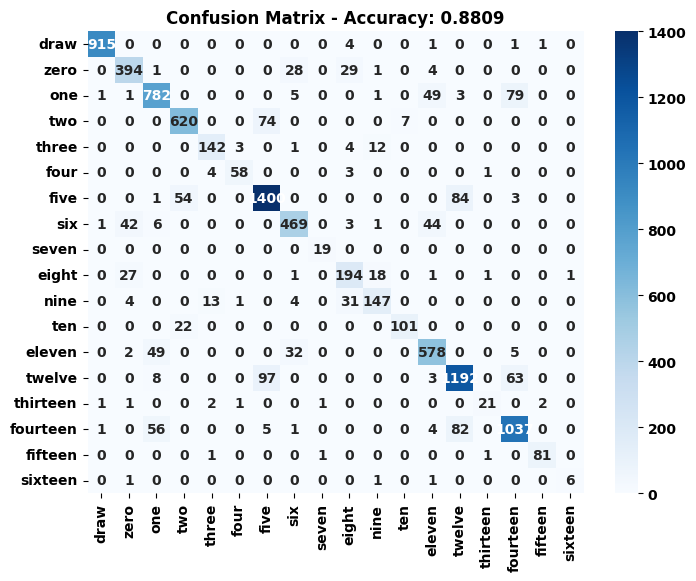

Epoch 1/700
588/588 [==============================] - 2s 3ms/step - loss: 2.3604 - accuracy: 0.1670
Epoch 2/700
588/588 [==============================] - 1s 3ms/step - loss: 2.1218 - accuracy: 0.2301
Epoch 3/700
588/588 [==============================] - 2s 3ms/step - loss: 1.9478 - accuracy: 0.2849
Epoch 4/700
588/588 [==============================] - 2s 3ms/step - loss: 1.7731 - accuracy: 0.3357
Epoch 5/700
588/588 [==============================] - 1s 3ms/step - loss: 1.6379 - accuracy: 0.3818
Epoch 6/700
588/588 [==============================] - 2s 3ms/step - loss: 1.5554 - accuracy: 0.4104
Epoch 7/700
588/588 [==============================] - 1s 3ms/step - loss: 1.4861 - accuracy: 0.4241
Epoch 8/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4409 - accuracy: 0.4411
Epoch 9/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3934 - accuracy: 0.4507
Epoch 10/700
588/588 [==============================] - 2s 3ms/step - loss: 1.3645 - accura

588/588 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.7915
Epoch 82/700
588/588 [==============================] - 1s 3ms/step - loss: 0.5236 - accuracy: 0.7911
Epoch 83/700
588/588 [==============================] - 1s 3ms/step - loss: 0.5116 - accuracy: 0.7927
Epoch 84/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4978 - accuracy: 0.7971
Epoch 85/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4977 - accuracy: 0.8013
Epoch 86/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4953 - accuracy: 0.7976
Epoch 87/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4874 - accuracy: 0.8004
Epoch 88/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4837 - accuracy: 0.8024
Epoch 89/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.8114
Epoch 90/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4643 - accuracy: 

588/588 [==============================] - 1s 3ms/step - loss: 0.2291 - accuracy: 0.9129
Epoch 161/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2183 - accuracy: 0.9159
Epoch 162/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.9128
Epoch 163/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2179 - accuracy: 0.9180
Epoch 164/700
588/588 [==============================] - 1s 2ms/step - loss: 0.2049 - accuracy: 0.9207
Epoch 165/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2231 - accuracy: 0.9152
Epoch 166/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2053 - accuracy: 0.9246
Epoch 167/700
588/588 [==============================] - 1s 3ms/step - loss: 0.2124 - accuracy: 0.9165
Epoch 168/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1949 - accuracy: 0.9279
Epoch 169/700
588/588 [==============================] - 2s 3ms/step - loss: 0.2226 - a

588/588 [==============================] - 1s 3ms/step - loss: 0.1446 - accuracy: 0.9498
Epoch 240/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1470 - accuracy: 0.9524
Epoch 241/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1043 - accuracy: 0.9637
Epoch 242/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1155 - accuracy: 0.9602
Epoch 243/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1092 - accuracy: 0.9624
Epoch 244/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1183 - accuracy: 0.9656
Epoch 245/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0630 - accuracy: 0.9798
Epoch 246/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1086 - accuracy: 0.9682
Epoch 247/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1682 - accuracy: 0.9425
Epoch 248/700
588/588 [==============================] - 2s 3ms/step - loss: 0.1399 - a

588/588 [==============================] - 2s 3ms/step - loss: 0.0064 - accuracy: 0.9992
Epoch 319/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 320/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 321/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 322/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 323/700
588/588 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9996
Epoch 324/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9998
Epoch 325/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 326/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 327/700
588/588 [==============================] - 2s 3ms/step - loss: 0.0017 - a

588/588 [==============================] - 2s 4ms/step - loss: 3.3858e-04 - accuracy: 1.0000
Epoch 396/700
588/588 [==============================] - 2s 3ms/step - loss: 3.3446e-04 - accuracy: 1.0000
Epoch 397/700
588/588 [==============================] - 2s 4ms/step - loss: 3.3159e-04 - accuracy: 1.0000
Epoch 398/700
588/588 [==============================] - 2s 4ms/step - loss: 3.2854e-04 - accuracy: 1.0000
Epoch 399/700
588/588 [==============================] - 2s 3ms/step - loss: 3.2473e-04 - accuracy: 1.0000
Epoch 400/700
588/588 [==============================] - 2s 3ms/step - loss: 3.2165e-04 - accuracy: 1.0000
Epoch 401/700
588/588 [==============================] - 2s 3ms/step - loss: 3.1826e-04 - accuracy: 1.0000
Epoch 402/700
588/588 [==============================] - 2s 3ms/step - loss: 3.1540e-04 - accuracy: 1.0000
Epoch 403/700
588/588 [==============================] - 2s 3ms/step - loss: 3.1114e-04 - accuracy: 1.0000
Epoch 404/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 1.8417e-04 - accuracy: 1.0000
Epoch 472/700
588/588 [==============================] - 2s 3ms/step - loss: 1.8405e-04 - accuracy: 1.0000
Epoch 473/700
588/588 [==============================] - 2s 3ms/step - loss: 1.8256e-04 - accuracy: 1.0000
Epoch 474/700
588/588 [==============================] - 2s 3ms/step - loss: 1.8206e-04 - accuracy: 1.0000
Epoch 475/700
588/588 [==============================] - 2s 3ms/step - loss: 1.8008e-04 - accuracy: 1.0000
Epoch 476/700
588/588 [==============================] - 2s 3ms/step - loss: 1.7916e-04 - accuracy: 1.0000
Epoch 477/700
588/588 [==============================] - 2s 3ms/step - loss: 1.7778e-04 - accuracy: 1.0000
Epoch 478/700
588/588 [==============================] - 2s 3ms/step - loss: 1.7679e-04 - accuracy: 1.0000
Epoch 479/700
588/588 [==============================] - 2s 3ms/step - loss: 1.7645e-04 - accuracy: 1.0000
Epoch 480/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 1.2533e-04 - accuracy: 1.0000
Epoch 548/700
588/588 [==============================] - 2s 3ms/step - loss: 1.2492e-04 - accuracy: 1.0000
Epoch 549/700
588/588 [==============================] - 2s 3ms/step - loss: 1.2412e-04 - accuracy: 1.0000
Epoch 550/700
588/588 [==============================] - 1s 3ms/step - loss: 1.2367e-04 - accuracy: 1.0000
Epoch 551/700
588/588 [==============================] - 2s 3ms/step - loss: 1.2300e-04 - accuracy: 1.0000
Epoch 552/700
588/588 [==============================] - 2s 3ms/step - loss: 1.2270e-04 - accuracy: 1.0000
Epoch 553/700
588/588 [==============================] - 1s 3ms/step - loss: 1.2228e-04 - accuracy: 1.0000
Epoch 554/700
588/588 [==============================] - 1s 3ms/step - loss: 1.2149e-04 - accuracy: 1.0000
Epoch 555/700
588/588 [==============================] - 1s 3ms/step - loss: 1.2135e-04 - accuracy: 1.0000
Epoch 556/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 9.3948e-05 - accuracy: 1.0000
Epoch 624/700
588/588 [==============================] - 2s 3ms/step - loss: 9.3561e-05 - accuracy: 1.0000
Epoch 625/700
588/588 [==============================] - 2s 3ms/step - loss: 9.3275e-05 - accuracy: 1.0000
Epoch 626/700
588/588 [==============================] - 2s 3ms/step - loss: 9.2918e-05 - accuracy: 1.0000
Epoch 627/700
588/588 [==============================] - 2s 3ms/step - loss: 9.2566e-05 - accuracy: 1.0000
Epoch 628/700
588/588 [==============================] - 2s 3ms/step - loss: 9.2416e-05 - accuracy: 1.0000
Epoch 629/700
588/588 [==============================] - 2s 3ms/step - loss: 9.2022e-05 - accuracy: 1.0000
Epoch 630/700
588/588 [==============================] - 2s 3ms/step - loss: 9.1676e-05 - accuracy: 1.0000
Epoch 631/700
588/588 [==============================] - 2s 3ms/step - loss: 9.1290e-05 - accuracy: 1.0000
Epoch 632/700
588/588 [============================

588/588 [==============================] - 2s 4ms/step - loss: 7.4407e-05 - accuracy: 1.0000
Epoch 700/700
588/588 [==============================] - 2s 3ms/step


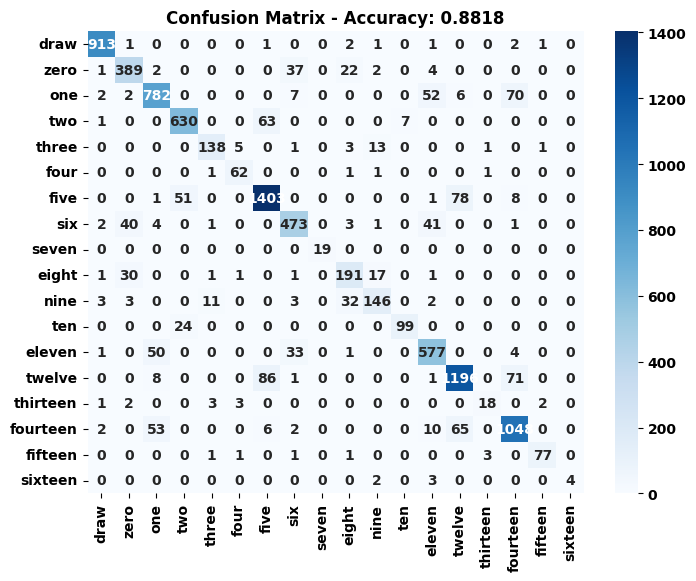

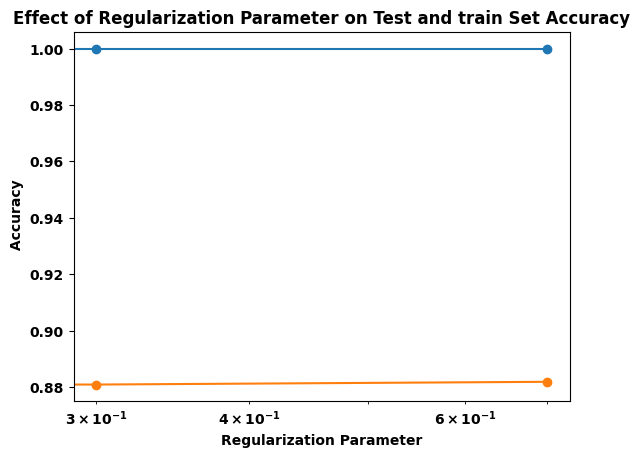

CPU times: total: 5min 33s
Wall time: 55min 25s


In [6]:


%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

#parameters
input_dim = X_train.shape[1]
output_dim = 18
hidden_layers = [(128, 128,128,128,128,128,32)]
learning_rate = 0.01
epochs = 700
lambda_values = [0,0.3,0.7]


# Lists to store results
regularization_values = []
accuracy_values = []
accuracy_values_train = []

for j in range(1):
    for regularization in lambda_values:
       #initialized models
        model = FFNN_tensorflow(input_dim=input_dim, output_dim=output_dim, hidden_layers=hidden_layers[j],
                                 regularization=regularization, learning_rate=learning_rate,cost_function="sparse_cat_cross_entropy")
         #fit model
        model.fit(X_train, y_train, epochs=epochs)
        
        #predict on testset
        predictions = model.predict(X_test)
        predictions_train = model.predict(X_train)
        pred = np.argmax(predictions, axis=1)
        pred_train=np.argmax( predictions_train, axis=1)
        
        #calculate accuracy
        test_accuracy = np.mean(pred == y_test)
        train_accuracy = np.mean(pred_train == y_train)
        
        #calculate confusion matrix
        cm = confusion_matrix(y_test,pred)
        plt.figure(figsize=(8, 6))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - Accuracy: {test_accuracy:.4f}")
        sns.heatmap(cm, annot=True,fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        folder_path = 'C:/Users/rasyd/Documents/fys-stk4155/project3/figure/krkopt/neural_sparse'

        # Specify the file name (with extension) and join it with the folder path
        file_path = os.path.join(folder_path, f'{hidden_layers[j]}FFNN{regularization}.png')

        # Save the plot
        plt.savefig(file_path)
        plt.show()

        # Append results to lists
        regularization_values.append(regularization)
        accuracy_values.append(test_accuracy)
        accuracy_values_train.append(train_accuracy)
    # Plot the results
    plt.plot(regularization_values, accuracy_values_train, marker='o',label="y_train")

    plt.plot(regularization_values, accuracy_values, marker='o',label="y_test")
    plt.xlabel('Regularization Parameter')
    plt.ylabel(' Accuracy')
    plt.title('Effect of Regularization Parameter on Test and train Set Accuracy')
    plt.xscale('log')  # Use log scale for better visualization if lambda values vary widely

    folder_path = 'C:/Users/rasyd/Documents/fys-stk4155/project3/figure/krkopt/neural_sparse'

    # Specify the file name (with extension) and join it with the folder path
    file_path = os.path.join(folder_path, f'FFNN_s{hidden_layers[j]}.png')

    # Save the plot
    plt.savefig(file_path)
    plt.show()
    accuracy_values = []
    accuracy_values_train=[]
    regularization_values=[]

Epoch 1/700
588/588 [==============================] - 4s 4ms/step - loss: 2.5094 - accuracy: 0.1546
Epoch 2/700
588/588 [==============================] - 3s 4ms/step - loss: 2.2780 - accuracy: 0.1657
Epoch 3/700
588/588 [==============================] - 3s 4ms/step - loss: 2.1929 - accuracy: 0.2122
Epoch 4/700
588/588 [==============================] - 3s 4ms/step - loss: 2.0233 - accuracy: 0.2467
Epoch 5/700
588/588 [==============================] - 2s 3ms/step - loss: 1.8346 - accuracy: 0.3151
Epoch 6/700
588/588 [==============================] - 2s 3ms/step - loss: 1.6762 - accuracy: 0.3701
Epoch 7/700
588/588 [==============================] - 2s 3ms/step - loss: 1.5630 - accuracy: 0.3975
Epoch 8/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4913 - accuracy: 0.4215
Epoch 9/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4479 - accuracy: 0.4279
Epoch 10/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4120 - accura

588/588 [==============================] - 2s 4ms/step - loss: 0.4875 - accuracy: 0.8041
Epoch 82/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4903 - accuracy: 0.8075
Epoch 83/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4684 - accuracy: 0.8164
Epoch 84/700
588/588 [==============================] - 2s 4ms/step - loss: 0.4827 - accuracy: 0.8110
Epoch 85/700
588/588 [==============================] - 2s 4ms/step - loss: 0.4791 - accuracy: 0.8099
Epoch 86/700
588/588 [==============================] - 3s 5ms/step - loss: 0.4619 - accuracy: 0.8208
Epoch 87/700
588/588 [==============================] - 2s 4ms/step - loss: 0.4587 - accuracy: 0.8216
Epoch 88/700
588/588 [==============================] - 2s 4ms/step - loss: 0.4454 - accuracy: 0.8244
Epoch 89/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4413 - accuracy: 0.8252
Epoch 90/700
588/588 [==============================] - 2s 3ms/step - loss: 0.4463 - accuracy: 

588/588 [==============================] - 2s 4ms/step - loss: 0.1879 - accuracy: 0.9355
Epoch 161/700
588/588 [==============================] - 2s 4ms/step - loss: 0.2031 - accuracy: 0.9245
Epoch 162/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1920 - accuracy: 0.9297
Epoch 163/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1906 - accuracy: 0.9307
Epoch 164/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1780 - accuracy: 0.9347
Epoch 165/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1782 - accuracy: 0.9345
Epoch 166/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1699 - accuracy: 0.9389
Epoch 167/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1954 - accuracy: 0.9307
Epoch 168/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1627 - accuracy: 0.9428
Epoch 169/700
588/588 [==============================] - 3s 4ms/step - loss: 0.1762 - a

588/588 [==============================] - 2s 4ms/step - loss: 0.1112 - accuracy: 0.9628
Epoch 240/700
588/588 [==============================] - 3s 4ms/step - loss: 0.0924 - accuracy: 0.9688
Epoch 241/700
588/588 [==============================] - 3s 4ms/step - loss: 0.1021 - accuracy: 0.9664
Epoch 242/700
588/588 [==============================] - 3s 4ms/step - loss: 0.0814 - accuracy: 0.9727
Epoch 243/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1082 - accuracy: 0.9653
Epoch 244/700
588/588 [==============================] - 3s 4ms/step - loss: 0.0409 - accuracy: 0.9868
Epoch 245/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1082 - accuracy: 0.9658
Epoch 246/700
588/588 [==============================] - 2s 4ms/step - loss: 0.0976 - accuracy: 0.9670
Epoch 247/700
588/588 [==============================] - 2s 4ms/step - loss: 0.1027 - accuracy: 0.9681
Epoch 248/700
588/588 [==============================] - 2s 4ms/step - loss: 0.0710 - a

588/588 [==============================] - 2s 4ms/step - loss: 8.7388e-04 - accuracy: 0.9997
Epoch 319/700
588/588 [==============================] - 2s 3ms/step - loss: 6.9185e-04 - accuracy: 0.9998
Epoch 320/700
588/588 [==============================] - 2s 3ms/step - loss: 4.4759e-04 - accuracy: 0.9999
Epoch 321/700
588/588 [==============================] - 2s 3ms/step - loss: 3.8215e-04 - accuracy: 1.0000
Epoch 322/700
588/588 [==============================] - 2s 3ms/step - loss: 4.6118e-04 - accuracy: 0.9999
Epoch 323/700
588/588 [==============================] - 2s 3ms/step - loss: 4.6073e-04 - accuracy: 0.9999
Epoch 324/700
588/588 [==============================] - 2s 3ms/step - loss: 4.2134e-04 - accuracy: 0.9999
Epoch 325/700
588/588 [==============================] - 2s 3ms/step - loss: 4.5884e-04 - accuracy: 0.9998
Epoch 326/700
588/588 [==============================] - 2s 3ms/step - loss: 4.7619e-04 - accuracy: 0.9999
Epoch 327/700
588/588 [============================

588/588 [==============================] - 2s 4ms/step - loss: 8.0023e-05 - accuracy: 1.0000
Epoch 396/700
588/588 [==============================] - 2s 3ms/step - loss: 7.8753e-05 - accuracy: 1.0000
Epoch 397/700
588/588 [==============================] - 2s 3ms/step - loss: 7.7487e-05 - accuracy: 1.0000
Epoch 398/700
588/588 [==============================] - 2s 4ms/step - loss: 7.6154e-05 - accuracy: 1.0000
Epoch 399/700
588/588 [==============================] - 3s 4ms/step - loss: 7.4902e-05 - accuracy: 1.0000
Epoch 400/700
588/588 [==============================] - 2s 4ms/step - loss: 7.3808e-05 - accuracy: 1.0000
Epoch 401/700
588/588 [==============================] - 2s 4ms/step - loss: 7.2491e-05 - accuracy: 1.0000
Epoch 402/700
588/588 [==============================] - 2s 3ms/step - loss: 7.1549e-05 - accuracy: 1.0000
Epoch 403/700
588/588 [==============================] - 2s 3ms/step - loss: 7.0400e-05 - accuracy: 1.0000
Epoch 404/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 3.3990e-05 - accuracy: 1.0000
Epoch 472/700
588/588 [==============================] - 2s 4ms/step - loss: 3.3735e-05 - accuracy: 1.0000
Epoch 473/700
588/588 [==============================] - 2s 4ms/step - loss: 3.3453e-05 - accuracy: 1.0000
Epoch 474/700
588/588 [==============================] - 2s 3ms/step - loss: 3.3193e-05 - accuracy: 1.0000
Epoch 475/700
588/588 [==============================] - 2s 4ms/step - loss: 3.2926e-05 - accuracy: 1.0000
Epoch 476/700
588/588 [==============================] - 2s 3ms/step - loss: 3.2708e-05 - accuracy: 1.0000
Epoch 477/700
588/588 [==============================] - 2s 3ms/step - loss: 3.2451e-05 - accuracy: 1.0000
Epoch 478/700
588/588 [==============================] - 2s 3ms/step - loss: 3.2191e-05 - accuracy: 1.0000
Epoch 479/700
588/588 [==============================] - 2s 3ms/step - loss: 3.1958e-05 - accuracy: 1.0000
Epoch 480/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 2.1030e-05 - accuracy: 1.0000
Epoch 548/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0922e-05 - accuracy: 1.0000
Epoch 549/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0820e-05 - accuracy: 1.0000
Epoch 550/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0706e-05 - accuracy: 1.0000
Epoch 551/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0601e-05 - accuracy: 1.0000
Epoch 552/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0503e-05 - accuracy: 1.0000
Epoch 553/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0408e-05 - accuracy: 1.0000
Epoch 554/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0302e-05 - accuracy: 1.0000
Epoch 555/700
588/588 [==============================] - 2s 3ms/step - loss: 2.0203e-05 - accuracy: 1.0000
Epoch 556/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 1.5097e-05 - accuracy: 1.0000
Epoch 624/700
588/588 [==============================] - 2s 3ms/step - loss: 1.5043e-05 - accuracy: 1.0000
Epoch 625/700
588/588 [==============================] - 2s 4ms/step - loss: 1.4981e-05 - accuracy: 1.0000
Epoch 626/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4938e-05 - accuracy: 1.0000
Epoch 627/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4879e-05 - accuracy: 1.0000
Epoch 628/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4824e-05 - accuracy: 1.0000
Epoch 629/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4768e-05 - accuracy: 1.0000
Epoch 630/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4713e-05 - accuracy: 1.0000
Epoch 631/700
588/588 [==============================] - 2s 3ms/step - loss: 1.4660e-05 - accuracy: 1.0000
Epoch 632/700
588/588 [============================

588/588 [==============================] - 2s 3ms/step - loss: 1.1727e-05 - accuracy: 1.0000
Epoch 700/700
588/588 [==============================] - 1s 2ms/step


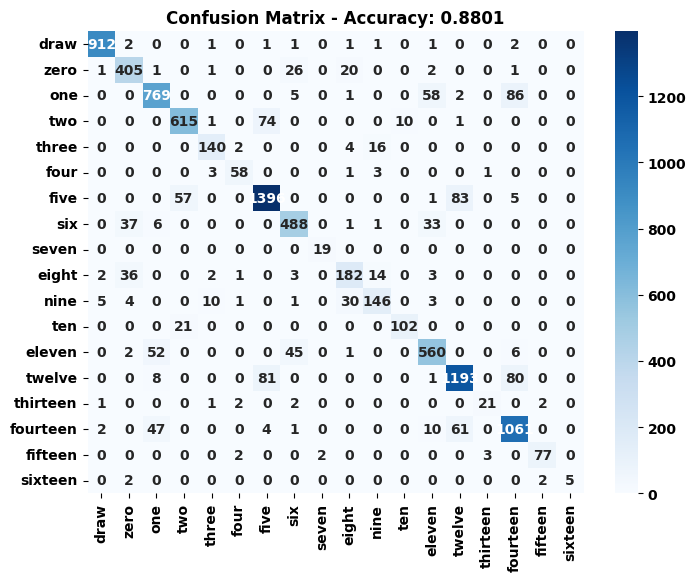

<timed exec>:64: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


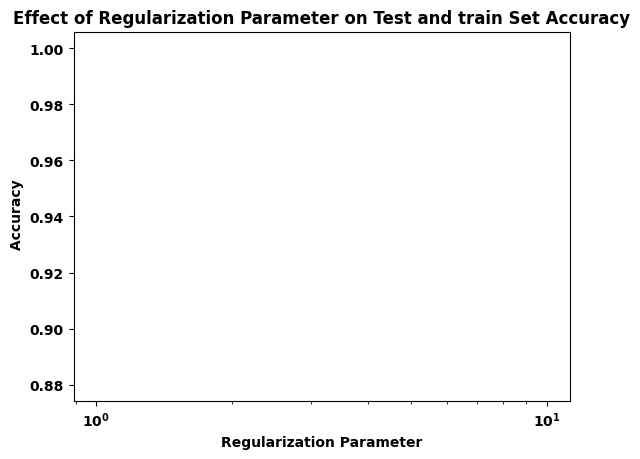

CPU times: total: 4min 54s
Wall time: 24min 48s


In [7]:


%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

#parameters
input_dim = X_train.shape[1]
output_dim = 18
hidden_layers = [(128, 128,128,128,128,128,128,128,128,128,32)]
learning_rate = 0.01
epochs = 700
lambda_values = [0]


# Lists to store results
regularization_values = []
accuracy_values = []
accuracy_values_train = []

for j in range(1):
    for regularization in lambda_values:
         #initialized models
        model = FFNN_tensorflow(input_dim=input_dim, output_dim=output_dim, hidden_layers=hidden_layers[j],
                                 regularization=regularization, learning_rate=learning_rate,cost_function="sparse_cat_cross_entropy")
        
        #fit model
        model.fit(X_train, y_train, epochs=epochs)
        
        #predict on testdata
        predictions = model.predict(X_test)
        predictions_train = model.predict(X_train)
        pred = np.argmax(predictions, axis=1)
        pred_train=np.argmax( predictions_train, axis=1)
        
        #compute accuracy
        test_accuracy = np.mean(pred == y_test)
        train_accuracy = np.mean(pred_train == y_train)
        
        #compute cofusion matrix
        cm = confusion_matrix(y_test,pred)
        plt.figure(figsize=(8, 6))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - Accuracy: {test_accuracy:.4f}")
        sns.heatmap(cm, annot=True,fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        folder_path = 'C:/Users/rasyd/Documents/fys-stk4155/project3/figure/krkopt/neural_sparse'

        # Specify the file name (with extension) and join it with the folder path
        file_path = os.path.join(folder_path, f'{hidden_layers[j]}FFNN{regularization}.png')

        # Save the plot
        plt.savefig(file_path)
        plt.show()

        # Append results to lists
        regularization_values.append(regularization)
        accuracy_values.append(test_accuracy)
        accuracy_values_train.append(train_accuracy)
    # Plot the results
    plt.plot(regularization_values, accuracy_values_train, marker='o',label="y_train")

    plt.plot(regularization_values, accuracy_values, marker='o',label="y_test")
    plt.xlabel('Regularization Parameter')
    plt.ylabel(' Accuracy')
    plt.title('Effect of Regularization Parameter on Test and train Set Accuracy')
    plt.xscale('log')  # Use log scale for better visualization if lambda values vary widely

    folder_path = 'C:/Users/rasyd/Documents/fys-stk4155/project3/figure/krkopt/neural_sparse'

    # Specify the file name (with extension) and join it with the folder path
    file_path = os.path.join(folder_path, f'FFNN_s{hidden_layers[j]}.png')

    # Save the plot
    plt.savefig(file_path)
    plt.show()
    accuracy_values = []
    accuracy_values_train=[]
    regularization_values=[]